# Feature Engineering

following the data analysis carried out in the previous module, here are the following steps for feature engineering 
- One-Hot encode the variable "Geography"
- Label-Encode the variable "Gender"
- Apply log transformation on the Age variable feature
- Create a binary feature from the column Balance and drop the column Balance
- We will also apply SMOTE technique to tackle the data imbalance
- Scale the input features using MinMax scaler


In [1]:
# importing necessary module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.transformation import LogTransformer
from sklearn.preprocessing import Binarizer, MinMaxScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.selection import DropFeatures
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold



from sklearn.metrics import accuracy_score, recall_score , precision_score, confusion_matrix

import warnings

warnings.filterwarnings('ignore')

In [2]:
# loading up the dataset
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# split data into feature and target
X = data.drop('Exited', axis=1)
y = data['Exited']

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (10000, 13)
y shape:  (10000,)


In [4]:
# Split data into train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

print("X_train shape:", X_train.shape)
print("y_test shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape: (7500, 13)
y_test shape:  (7500,)
X_test shape:  (2500, 13)
y_test shape:  (2500,)


**Drop Unwanted Columns**

In [5]:
# drop surname, CustomerId, and RowNumber
drop_col = DropFeatures(features_to_drop=['Surname', 'CustomerId', 'RowNumber'])
drop_col.fit(X_train)
X_train = drop_col.transform(X_train)
X_test = drop_col.transform(X_test)
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9414,544,Spain,Female,53,9,0.00,1,1,0,125692.07
3363,747,Germany,Male,38,2,129728.60,1,1,0,89289.54
2979,642,France,Male,40,1,154863.15,1,1,1,138052.51
578,593,France,Female,41,6,0.00,1,1,0,65170.66
7984,464,France,Male,46,6,161798.53,1,1,0,182944.47


**Label Encode the Gender Variable**

In [6]:
label_encoder = OrdinalEncoder(variables=['Gender'])
label_encoder.fit(X_train, y_train)
X_train = label_encoder.transform(X_train)
X_test = label_encoder.transform(X_test)
print(label_encoder.encoder_dict_)
X_train.head()

{'Gender': {'Male': 0, 'Female': 1}}


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9414,544,Spain,1,53,9,0.00,1,1,0,125692.07
3363,747,Germany,0,38,2,129728.60,1,1,0,89289.54
2979,642,France,0,40,1,154863.15,1,1,1,138052.51
578,593,France,1,41,6,0.00,1,1,0,65170.66
7984,464,France,0,46,6,161798.53,1,1,0,182944.47


**One Hot Encode the Geography variable**

In [7]:
ohe_encoder = OneHotEncoder(variables=['Geography'])
ohe_encoder.fit(X_train)
X_train = ohe_encoder.transform(X_train)
X_test = ohe_encoder.transform(X_test)
print(ohe_encoder.encoder_dict_)
X_train.head()

{'Geography': ['Spain', 'Germany', 'France']}


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Spain,Geography_Germany,Geography_France
9414,544,1,53,9,0.00,1,1,0,125692.07,1,0,0
3363,747,0,38,2,129728.60,1,1,0,89289.54,0,1,0
2979,642,0,40,1,154863.15,1,1,1,138052.51,0,0,1
578,593,1,41,6,0.00,1,1,0,65170.66,0,0,1
7984,464,0,46,6,161798.53,1,1,0,182944.47,0,0,1


**apply log transformation on the Age column**

In [8]:
log_tranformer = LogTransformer(variables=['Age'])
log_tranformer.fit(X_train)
X_train = log_tranformer.transform(X_train)
X_test = log_tranformer.transform(X_test)
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Spain,Geography_Germany,Geography_France
9414,544,1,3.970292,9,0.00,1,1,0,125692.07,1,0,0
3363,747,0,3.637586,2,129728.60,1,1,0,89289.54,0,1,0
2979,642,0,3.688879,1,154863.15,1,1,1,138052.51,0,0,1
578,593,1,3.713572,6,0.00,1,1,0,65170.66,0,0,1
7984,464,0,3.828641,6,161798.53,1,1,0,182944.47,0,0,1


**Binarize the Balance column**

In [9]:
binarizer = SklearnTransformerWrapper(Binarizer(threshold=0), variables=['Balance'])
binarizer.fit(X_train)
X_train = binarizer.transform(X_train)
X_test = binarizer.transform(X_test)

**Scale the input features**

In [10]:
# lastly we scale the input features
scaler  = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
features = scaler.get_feature_names_out()
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)


In [12]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Spain,Geography_Germany,Geography_France
0,0.388,1.0,0.661952,0.9,0.0,0.0,1.0,0.0,0.628462,1.0,0.0,0.0
1,0.794,0.0,0.458016,0.2,1.0,0.0,1.0,0.0,0.446432,0.0,1.0,0.0
2,0.584,0.0,0.489457,0.1,1.0,0.0,1.0,1.0,0.690271,0.0,0.0,1.0
3,0.486,1.0,0.504592,0.6,0.0,0.0,1.0,0.0,0.325827,0.0,0.0,1.0
4,0.228,0.0,0.575126,0.6,1.0,0.0,1.0,0.0,0.914752,0.0,0.0,1.0


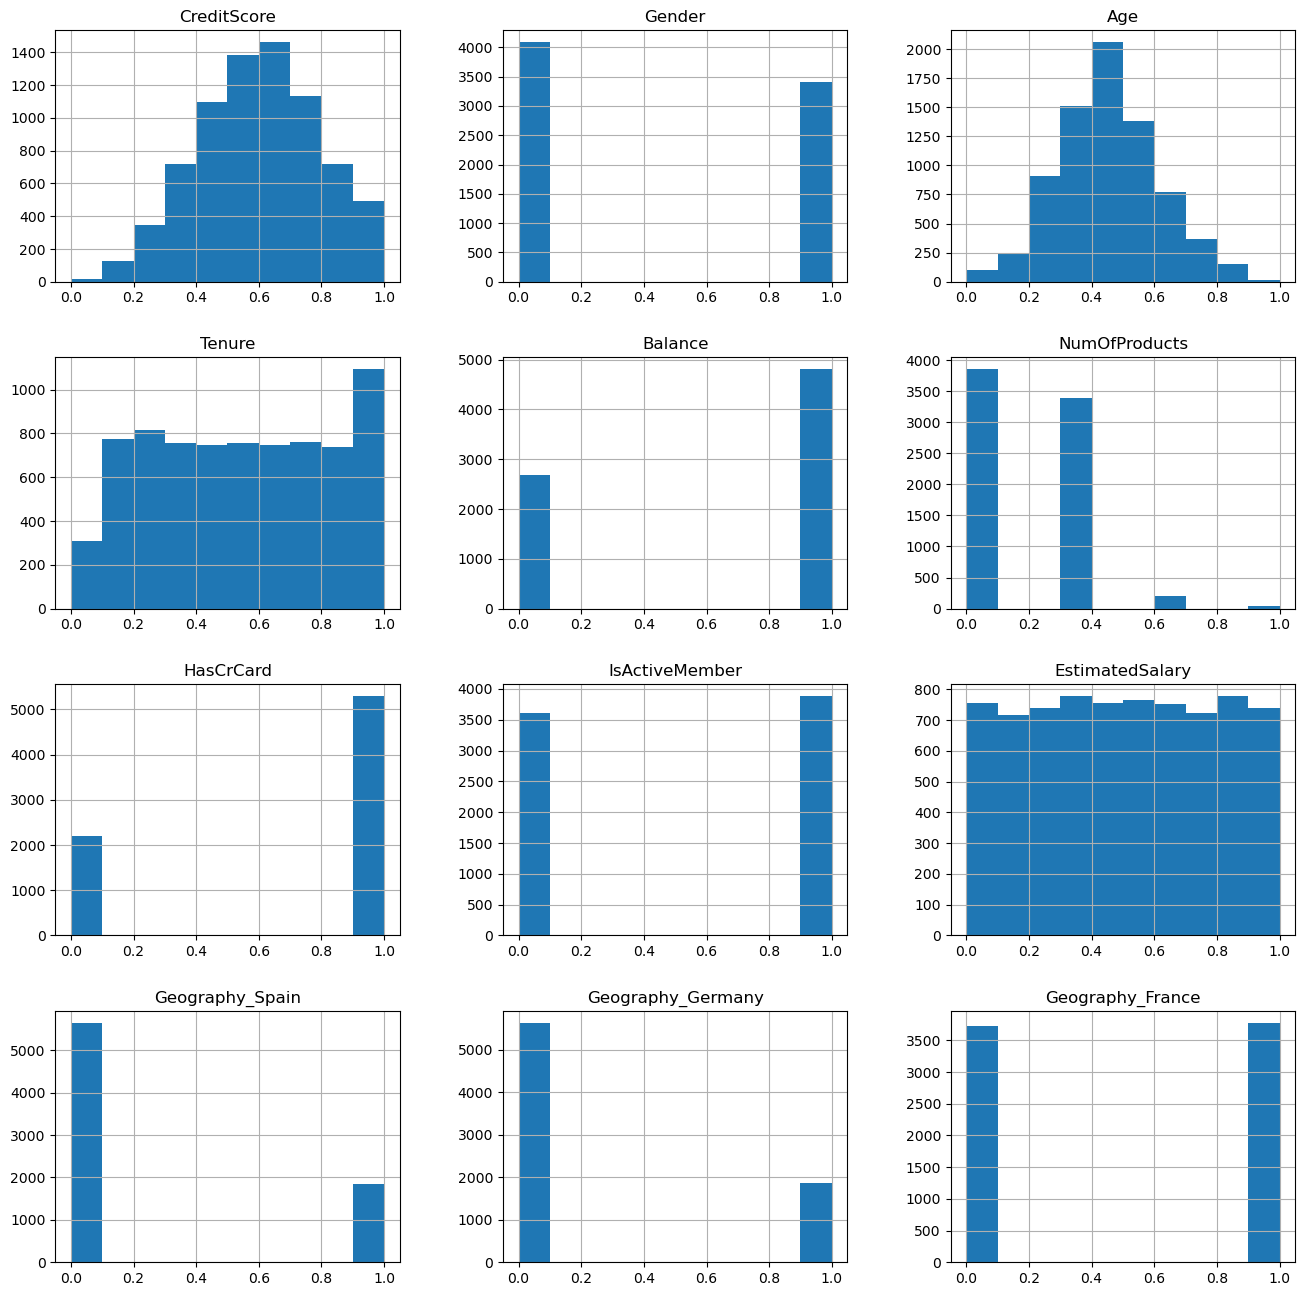

In [13]:
fig, ax = plt.subplots(figsize=(16,16))
X_train.hist(ax= ax)
plt.show()

From the above distribution graph, we can see that all features are on the same scale ranging from zero to one.

**Tackling Imbalance in the Dataset**

In [14]:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [15]:
print("Distribution of churn before SMOTE: ", y_train.value_counts(normalize=True))
print("Distribution of churn after SMOTE: ", y_train_resampled.value_counts(normalize=True))


Distribution of churn before SMOTE:  Exited
0    0.796267
1    0.203733
Name: proportion, dtype: float64
Distribution of churn after SMOTE:  Exited
1    0.5
0    0.5
Name: proportion, dtype: float64


# Model Building 

I will be training up different model on both the unsampled training dataset and the resampled training dataset. The following classic machine learning models:
- Logistic Regression
- Random Forest Tree
- Gradient Boost
- SVM

we will also Use an artificial Neural network (ANN) algorithm to train our datasets

In [16]:
# Define a list of classifiers to use
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC()
]

# Define parameters for each classifier
param_grids = [
    {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]},
    {'max_depth': [3,4,5], 'n_estimators': [100,200,500], 'max_features': ['sqrt', 'log2', None]},
    {'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10], 'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]},
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 0.01, 0.1, 1]}
]

**Hyperparameter Tunning with Grid Search**

In [17]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
for i, clf in enumerate(classifiers):
    grid_search = GridSearchCV(clf, param_grid=param_grids[i], 
                               scoring='accuracy', cv=cv)
    print(f"Training on {clf}")
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameter for classifier{i}: {grid_search.best_params_}")
    print(f"Training accuracy for classifier {i}: {grid_search.score(X_train, y_train)}")
    print("=======================================================================")
    print()

Training on LogisticRegression()
Best parameter for classifier0: {'C': 10, 'penalty': 'l2'}
Training accuracy for classifier 0: 0.8153333333333334

Training on RandomForestClassifier()
Best parameter for classifier1: {'max_depth': 5, 'max_features': None, 'n_estimators': 200}
Training accuracy for classifier 1: 0.8684

Training on GradientBoostingClassifier()
Best parameter for classifier2: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
Training accuracy for classifier 2: 0.8718666666666667

Training on SVC()
Best parameter for classifier3: {'C': 1, 'gamma': 1, 'kernel': 'poly'}
Training accuracy for classifier 3: 0.8614666666666667



In [18]:
base_accuracy = y_train.value_counts(normalize=True).values.max()

In [20]:
print("--------Base Model Accuracy---------")
round(base_accuracy*100)

--------Base Model Accuracy---------


80

## Model Evaluation

In [21]:
logistic_reg = LogisticRegression(C=10, penalty='l2')
random_forest = RandomForestClassifier(max_depth=5, n_estimators=200, max_features=None)
gradient_boost = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, min_samples_split=10)
svc = SVC(C=1, gamma=1, kernel='poly')

In [22]:
logistic_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boost.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='poly')

In [23]:
# Prediction on Train set
train_y_pred_log = logistic_reg.predict(X_train)
train_y_pred_forest = random_forest.predict(X_train)
train_y_pred_grad = gradient_boost.predict(X_train)
train_y_pred_svc = svc.predict(X_train)

In [24]:
# Prediction on Test set
y_pred_log = logistic_reg.predict(X_test)
y_pred_forest = random_forest.predict(X_test)
y_pred_grad = gradient_boost.predict(X_test)
y_pred_svc = svc.predict(X_test)

**Accuracy Scores**

In [25]:
# Accuracy Score on Train set
train_acc_logistic_reg = accuracy_score(y_train, train_y_pred_log) * 100
train_acc_random_forest = accuracy_score(y_train, train_y_pred_forest) * 100
train_acc_gradient_boost = accuracy_score(y_train, train_y_pred_grad) * 100
train_acc_svc = accuracy_score(y_train, train_y_pred_svc) * 100

In [26]:
# Accuracy Score on Test set
acc_logistic_reg = accuracy_score(y_test, y_pred_log) * 100
acc_random_forest = accuracy_score(y_test, y_pred_forest) * 100
acc_gradient_boost = accuracy_score(y_test, y_pred_grad) * 100
acc_svc = accuracy_score(y_test, y_pred_svc) * 100

**Precision Scores**

In [27]:
# Precision Score on Train set
train_precision_logistic_reg = precision_score(y_train, train_y_pred_log) * 100
train_precision_random_forest = precision_score(y_train, train_y_pred_forest) * 100
train_precision_gradient_boost = precision_score(y_train, train_y_pred_grad) * 100
train_precision_svc = precision_score(y_train, train_y_pred_svc) * 100

In [28]:
# Precision Score on the Test Set
precision_logistic_reg = precision_score(y_test, y_pred_log) * 100
precision_random_forest = precision_score(y_test, y_pred_forest) * 100
precision_gradient_boost = precision_score(y_test, y_pred_grad) * 100
precision_svc = precision_score(y_test, y_pred_svc) * 100

**Recall Scores**

In [29]:
# Recall Score on the Train Set
train_recall_logistic_reg = recall_score(y_train, train_y_pred_log) * 100
train_recall_random_forest = recall_score(y_train, train_y_pred_forest) * 100
train_recall_gradient_boost = recall_score(y_train, train_y_pred_grad) * 100
train_recall_svc = recall_score(y_train, train_y_pred_svc) * 100

In [30]:
# Recall Score on Test Set
recall_logistic_reg = recall_score(y_test, y_pred_log) * 100
recall_random_forest = recall_score(y_test, y_pred_forest) * 100
recall_gradient_boost = recall_score(y_test, y_pred_grad) * 100
recall_svc = recall_score(y_test, y_pred_svc) * 100

In [31]:
train_metrics_data = pd.DataFrame({"Accuracy": [train_acc_logistic_reg, train_acc_random_forest, train_acc_gradient_boost, train_acc_svc],
                            "Precision": [train_precision_logistic_reg, train_precision_random_forest, train_precision_gradient_boost, train_precision_svc],
                            "Recall": [train_recall_logistic_reg, train_recall_random_forest, train_recall_gradient_boost, train_recall_svc]})

train_metrics_data.index = ['Logistic_Regression', 'Random_Forest', 'Gradient_Boost', 'Support_Vector']
train_metrics_data

,Accuracy,Precision,Recall
Logistic_Regression,81.533333,62.699822,23.102094
Random_Forest,86.346667,80.434783,43.586387
Gradient_Boost,87.186667,80.582524,48.887435
Support_Vector,86.146667,83.539095,39.856021


In [32]:
metrics_data = pd.DataFrame({"Accuracy": [acc_logistic_reg, acc_random_forest, acc_gradient_boost, acc_svc],
                            "Precision": [precision_logistic_reg, precision_random_forest, precision_gradient_boost, precision_svc],
                            "Recall": [recall_logistic_reg, recall_random_forest, recall_gradient_boost, recall_svc]})

metrics_data.index = ['Logistic_Regression', 'Random_Forest', 'Gradient_Boost', 'Support_Vector']
metrics_data

,Accuracy,Precision,Recall
Logistic_Regression,81.36,61.497326,22.593320
Random_Forest,85.12,76.653696,38.703340
Gradient_Boost,85.36,74.570447,42.632613
Support_Vector,85.04,79.735683,35.559921


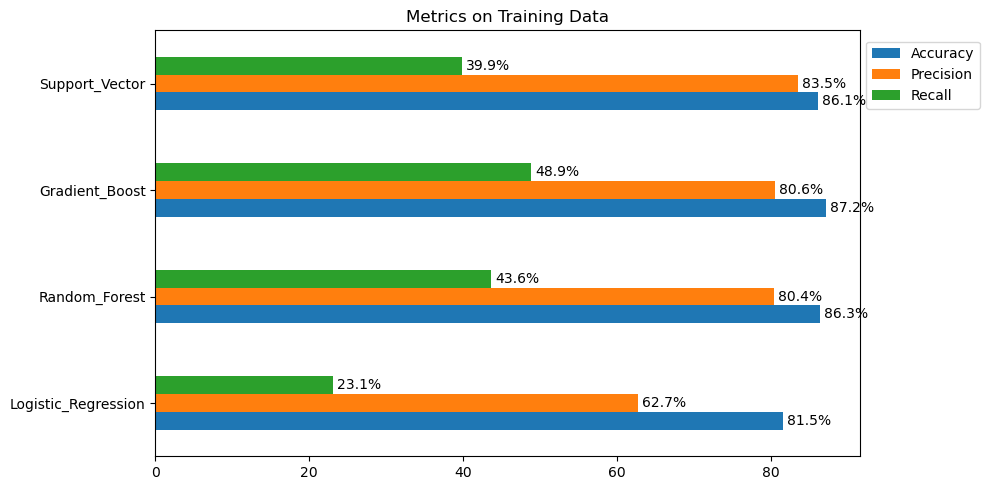

In [33]:
ax1 = train_metrics_data.plot.barh(figsize=(10,5))
plt.title("Metrics on Training Data")
plt.legend(loc='lower left', bbox_to_anchor=(1,0.8))
for bars in ax1.containers:
    #ax.bar_label(bars, fmt="%.2f", label_type='edge', padding=3)
    ax1.bar_label(bars, fmt="%.1f%%", label_type='edge', padding=3)  # this adds labels as percentage
plt.tight_layout()
plt.show()

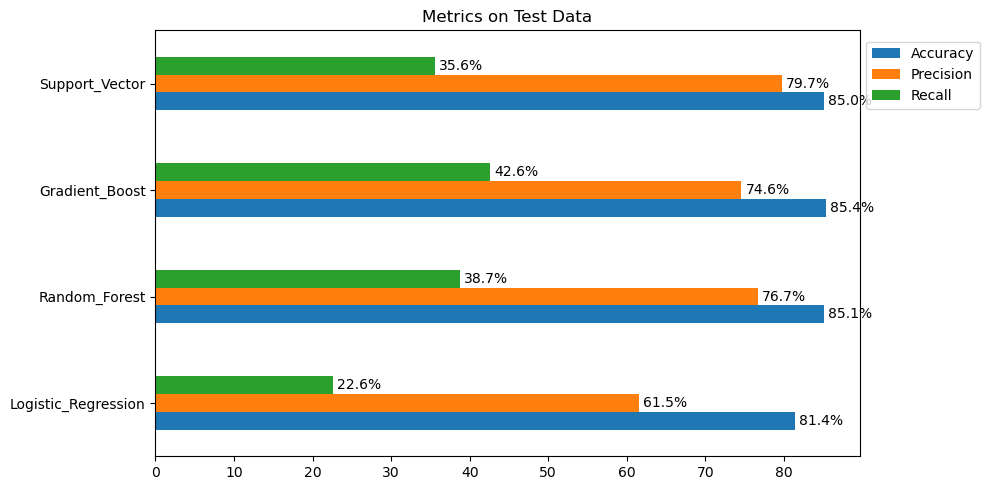

In [34]:
ax2 = metrics_data.plot.barh(figsize=(10,5))
plt.title("Metrics on Test Data")
plt.legend(loc='lower left', bbox_to_anchor=(1,0.8))
for bars in ax2.containers:
    #ax.bar_label(bars, fmt="%.2f", label_type='edge', padding=3)
    ax2.bar_label(bars, fmt="%.1f%%", label_type='edge', padding=3)  # this adds labels as percentage
plt.tight_layout()
plt.show()

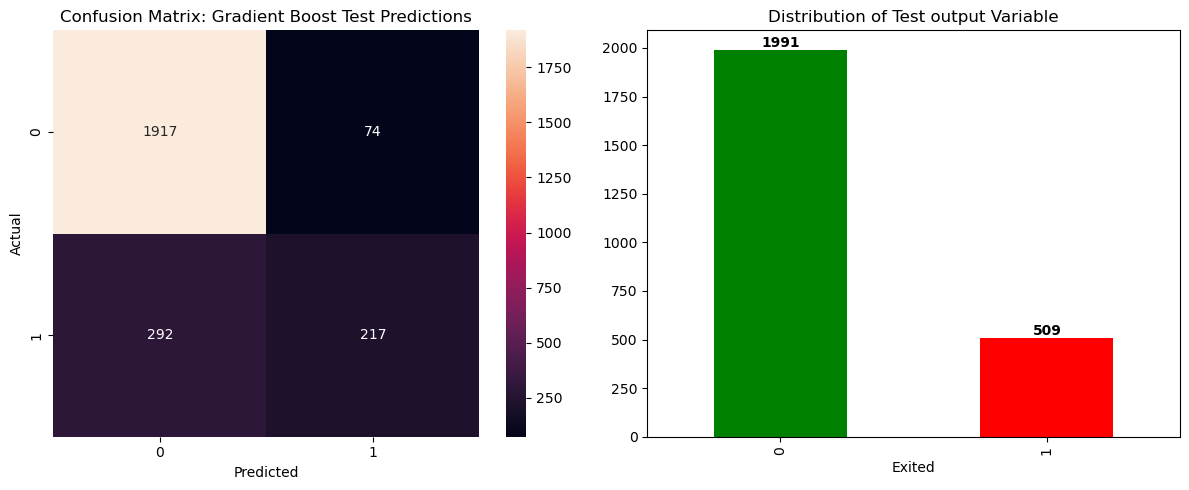

In [35]:
# Getting the cnfusion Matrics for Gradient Boost
conf_matrix = confusion_matrix(y_test, y_pred_grad)
y_test_vals = y_test.value_counts()

fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',ax=ax[0])
y_test_vals.plot(kind='bar', ax=ax[1], color=['green', 'red'])

for i, val in enumerate(y_test_vals.values):
    ax[1].text(i, val, f"{val}", ha='center', va='bottom', weight='bold')


ax[1].set_title("Distribution of Test output Variable")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")
ax[0].set_title("Confusion Matrix: Gradient Boost Test Predictions")
plt.tight_layout()
plt.show()

From the above model evaluation, Gradient boost outperforms the rest of the model with the highest accuracy of 85.4% on the test set. Because of the imbalance nature of the data, the accuracy score can not be relied on. Precision score and Recall score were also used as parts of the metrics used to evaluate the models. Gradient boost gave a better recall score than the rest of the models. From the confusion matrix plot above, of all 509 people that left (churn), the best model was able to predict 217 correctly as churn. The rest of the 292 churn were wrongly predicted as no churn.

### Evaluating Resampled Dataset

In [36]:
logistic_reg_s = LogisticRegression(C=10, penalty='l2')
random_forest_s = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=None)
gradient_boost_s= GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, min_samples_split=10)
svc_s = SVC(C=1, gamma=1, kernel='poly')

In [37]:
logistic_reg_s.fit(X_train_resampled, y_train_resampled)
random_forest_s.fit(X_train_resampled, y_train_resampled)
gradient_boost_s.fit(X_train_resampled, y_train_resampled)
svc_s.fit(X_train_resampled, y_train_resampled)

SVC(C=1, gamma=1, kernel='poly')

In [38]:
# predicting train set
train_y_pred_log_s = logistic_reg_s.predict(X_train)
train_y_pred_forest_s = random_forest_s.predict(X_train)
train_y_pred_grad_s = gradient_boost_s.predict(X_train)
train_y_pred_svc_s = svc_s.predict(X_train)

In [39]:
# predicting test set
y_pred_log_s = logistic_reg_s.predict(X_test)
y_pred_forest_s = random_forest_s.predict(X_test)
y_pred_grad_s = gradient_boost_s.predict(X_test)
y_pred_svc_s = svc_s.predict(X_test)

**Accuracy Score**

In [40]:
# Accuracy on Train set
train_acc_logistic_reg_s = accuracy_score(y_train, train_y_pred_log_s) *100
train_acc_random_forest_s = accuracy_score(y_train, train_y_pred_forest_s) *100
train_acc_gradient_boost_s = accuracy_score(y_train, train_y_pred_grad_s) *100
train_acc_svc_s = accuracy_score(y_train, train_y_pred_svc_s) * 100

In [41]:
acc_logistic_reg_s = accuracy_score(y_test, y_pred_log_s) *100
acc_random_forest_s = accuracy_score(y_test, y_pred_forest_s) *100
acc_gradient_boost_s = accuracy_score(y_test, y_pred_grad_s) *100
acc_svc_s = accuracy_score(y_test, y_pred_svc_s) * 100

**Precision Score**

In [42]:
train_precision_logistic_reg_s = precision_score(y_train, train_y_pred_log_s) * 100
train_precision_random_forest_s = precision_score(y_train, train_y_pred_forest_s) * 100
train_precision_gradient_boost_s = precision_score(y_train, train_y_pred_grad_s) * 100
train_precision_svc_s = precision_score(y_train, train_y_pred_svc_s) * 100

In [43]:
precision_logistic_reg_s = precision_score(y_test, y_pred_log_s) * 100
precision_random_forest_s = precision_score(y_test, y_pred_forest_s) * 100
precision_gradient_boost_s = precision_score(y_test, y_pred_grad_s) * 100
precision_svc_s = precision_score(y_test, y_pred_svc_s) * 100

**Recall Score**

In [44]:
train_recall_logistic_reg_s = recall_score(y_train, train_y_pred_log_s) * 100
train_recall_random_forest_s = recall_score(y_train, train_y_pred_forest_s) * 100
train_recall_gradient_boost_s = recall_score(y_train, train_y_pred_grad_s) * 100
train_recall_svc_s = recall_score(y_train, train_y_pred_svc_s) * 100

In [45]:
recall_logistic_reg_s = recall_score(y_test, y_pred_log_s) * 100
recall_random_forest_s = recall_score(y_test, y_pred_forest_s) * 100
recall_gradient_boost_s = recall_score(y_test, y_pred_grad_s) * 100
recall_svc_s = recall_score(y_test, y_pred_svc_s) * 100

In [46]:
train_metrics_data_s = pd.DataFrame({"Accuracy": [train_acc_logistic_reg_s, train_acc_random_forest_s, train_acc_gradient_boost_s, train_acc_svc_s],
                            "Precision": [train_precision_logistic_reg_s, train_precision_random_forest_s, train_precision_gradient_boost_s, train_precision_svc_s],
                            "Recall": [train_recall_logistic_reg_s, train_recall_random_forest_s, train_recall_gradient_boost_s, train_recall_svc_s]})

train_metrics_data_s.index = ['Logistic_Regression', 'Random_Forest', 'Gradient_Boost', 'Support_Vector']
train_metrics_data_s

,Accuracy,Precision,Recall
Logistic_Regression,71.120000,38.607143,70.746073
Random_Forest,82.813333,57.091988,62.958115
Gradient_Boost,84.373333,60.507674,67.081152
Support_Vector,79.453333,49.726546,77.356021


In [47]:
metrics_data_s = pd.DataFrame({"Accuracy": [acc_logistic_reg_s, acc_random_forest_s, acc_gradient_boost_s, acc_svc_s],
                            "Precision": [precision_logistic_reg_s, precision_random_forest_s, precision_gradient_boost_s, precision_svc_s],
                            "Recall": [recall_logistic_reg_s, recall_random_forest_s, recall_gradient_boost_s, recall_svc_s]})

metrics_data_s.index = ['Logistic_Regression', 'Random_Forest', 'Gradient_Boost', 'Support_Vector']
metrics_data_s

,Accuracy,Precision,Recall
Logistic_Regression,70.48,38.085328,71.905697
Random_Forest,81.88,55.204461,58.349705
Gradient_Boost,83.16,58.118081,61.886051
Support_Vector,76.72,45.397226,70.726916


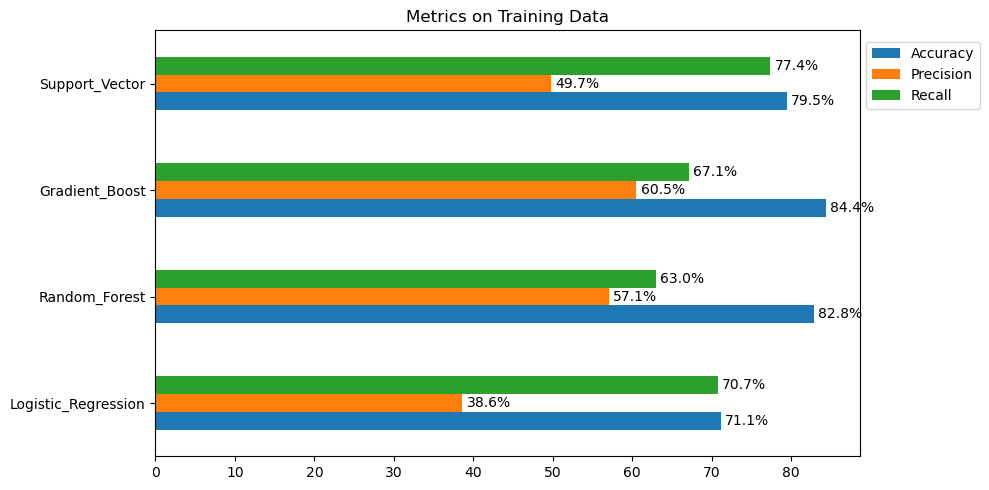

In [48]:
ax3 = train_metrics_data_s.plot.barh(figsize=(10,5))
plt.title("Metrics on Training Data")
plt.legend(loc='lower left', bbox_to_anchor=(1,0.8))
for bars in ax3.containers:
    #ax.bar_label(bars, fmt="%.2f", label_type='edge', padding=3)
    ax3.bar_label(bars, fmt="%.1f%%", label_type='edge', padding=3)  # this adds labels as percentage
plt.tight_layout()
plt.show()

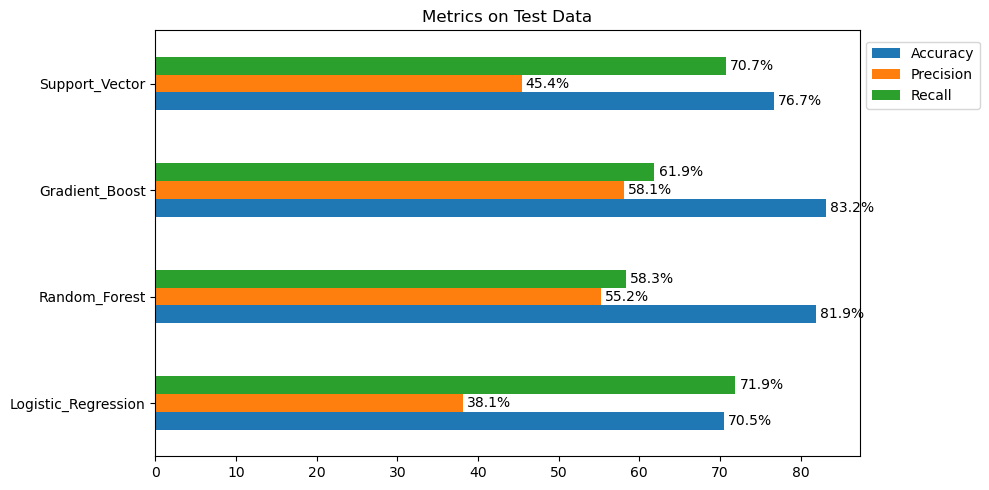

In [49]:
ax4 = metrics_data_s.plot.barh(figsize=(10,5))
plt.title("Metrics on Test Data")
plt.legend(loc='lower left', bbox_to_anchor=(1,0.8))
for bars in ax4.containers:
    #ax.bar_label(bars, fmt="%.2f", label_type='edge', padding=3)
    ax4.bar_label(bars, fmt="%.1f%%", label_type='edge', padding=3)  # this adds labels as percentage
plt.tight_layout()
plt.show()

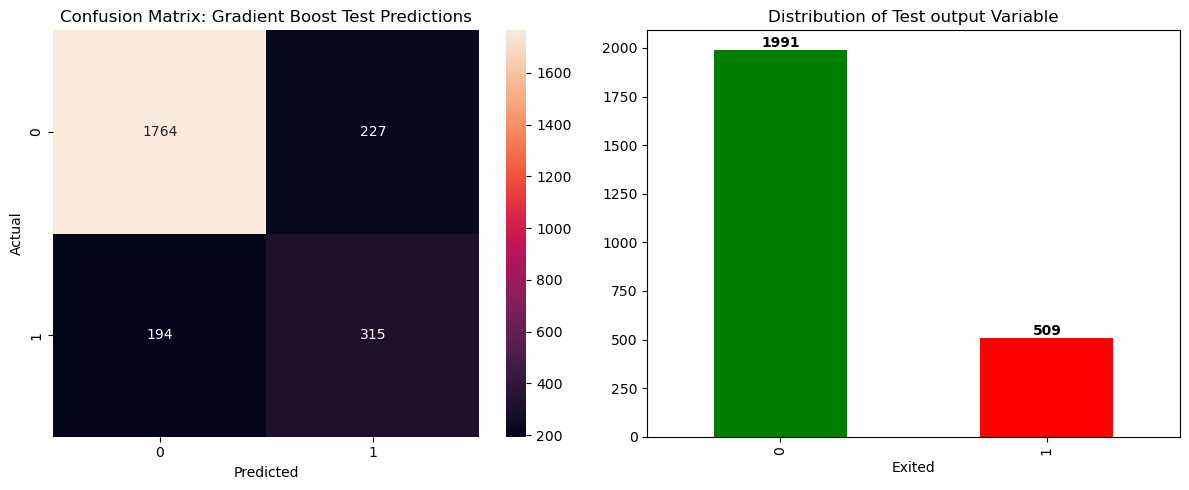

In [50]:
# Getting the cnfusion Matrics for Gradient Boost
conf_matrix_s = confusion_matrix(y_test, y_pred_grad_s)
y_test_vals = y_test.value_counts()

fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.heatmap(conf_matrix_s, annot=True,fmt='d',ax=ax[0])
y_test_vals.plot(kind='bar', ax=ax[1], color=['green', 'red'])

for i, val in enumerate(y_test_vals.values):
    ax[1].text(i, val, f"{val}", ha='center', va='bottom', weight='bold')


ax[1].set_title("Distribution of Test output Variable")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")
ax[0].set_title("Confusion Matrix: Gradient Boost Test Predictions")
plt.tight_layout()
plt.show()

After resampling the training dataset, we have accuracy, precision, and recall scores for all the models as shown in the figures above. We have Gradient boost as the best performing model with accuracy score of 83.2%. With the resampled data, the recall score improved from 42.6% to about 62% while prcision declined from 74.6% to 58.1%. With the model we are able to capture more churn.  From the confusion matrix plot above, of all 509 people that left (churn), the best model was able to predict 315 correctly as churn. The rest of the 194 churn were wrongly predicted as no churn. With the resampling technique in place, our model was able to capture more churners.

In [56]:
import pickle as pkl
from datetime import datetime as dt

date_str = dt.now().strftime("%Y-%m-%d")
file_name = f"gradient_boost_{date_str}.pkl"

with open(file_name, 'wb') as f:
    pkl.dump(gradient_boost_s, f)

print("model saved as ", file_name)

model saved as  gradient_boost_2025-09-16.pkl


## Interpretation

- Accuracy tells you how many predictions overall were correct. In an imbalanced dataset (like the one used in this project), where no-churn is the majority class, accuracy can be misleading because the model might mostly predict the majority class and still look good.

- **Precision** (positive predicted value) tells you how many customers actually churned of all the customers the model predicted would churn. High precision = fewer false alarm. A good instance is, if a business target predicted churners whit a retention offer, precision tells you how many of those offers go to actual churners (versus wasted offers n non-churners).

- **Recall** (Sensitivity, True Positive Rate) tells you how many churners the models caught  out of all the customers that churned. High Recall = fewer missed churners. If you miss churners, you lose them. Recall is crucial when the cost of missing churn is high.

**BEFORE RESAMPLING (GRADIENT BOOST):**
- Training Set
    - Accuracy: 87.2
    - Precision: 80.6
    - Recall: 48.9
- Test Set:
    - Accuracy: 85.4
    - Precision: 74.6
    - Recall: 42.6
    
High accuracy, strong precision, **but recall is low**. This means the model misses many actual churners, It only catches about 43% of them.

**AFTER RESAMPLING (GRADIENT BOOST):**
- Train Set
    - Accuracy: 84.4
    - Precision: 60.5
    - Recall: 67.1
- Test Set:
    - Accuracy: 83.2
    - Precision: 58.1
    - Recall: 61.9

On test set, recall jumped from 42.6% to 62%, this means that the model catches more churners(fewer missed). Precision dropped from 74.6% to 58.1% which means the model gives more false alarm.

The SMOTE resmpling technique helped the model focus on churners, trading off some precision (more false alarms) for much better recall (fewer missed churners). 